In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../data/Fossil_Fuels/global-fossil-fuel-consumption.csv")
data.head()

,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
0,1800,97,0,0
1,1810,128,0,0
2,1820,153,0,0
3,1830,264,0,0
4,1840,356,0,0


In [4]:
data['Year']= data['Year'].astype("int")

In [5]:
data=data.rename(columns = {'Coal (TWh; direct energy)': 'Coal(Terawatt-Hours)','Oil (TWh; direct energy)': 'Oil(Terawatt-Hours)', 
                       'Gas (TWh; direct energy)':'Gas(Terawatt-Hours)'})

In [6]:
# using global fossil fuels consumption from 1950 only
data = data[data.Year>1950]
data.tail()

,Year,Coal(Terawatt-Hours),Oil(Terawatt-Hours),Gas(Terawatt-Hours)
67,2015,43844,50892,34781
68,2016,43196,51920,35589
69,2017,43360,52568,36586
70,2018,44109,53181,38517
71,2019,43849,53620,39292


In [7]:
data.isna().sum()

Year                    0
Coal(Terawatt-Hours)    0
Oil(Terawatt-Hours)     0
Gas(Terawatt-Hours)     0
dtype: int64

We see that fossil fuel consumption is from three main sources namely <b>Coal, Oil and Gas</b>. Let us plot yearly comparison for all these three soucres

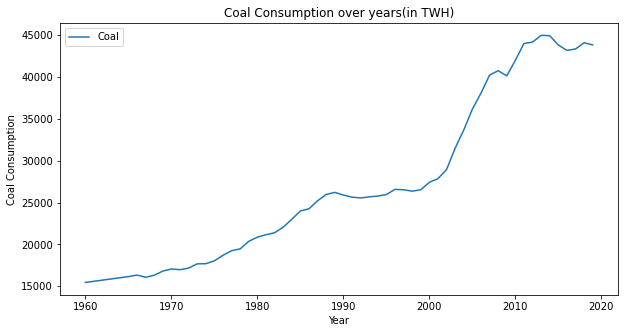

In [8]:
#plotting coal consumption vs year
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['Coal(Terawatt-Hours)'],label='Coal')
plt.ylabel("Coal Consumption")
plt.xlabel("Year")
plt.title("Coal Consumption over years(in TWH)")
plt.legend()
plt.show()

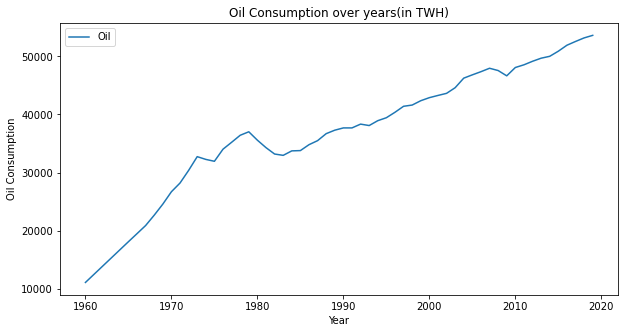

In [9]:
#plotting oil consumption vs year
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['Oil(Terawatt-Hours)'],label='Oil')
plt.ylabel("Oil Consumption")
plt.xlabel("Year")
plt.title("Oil Consumption over years(in TWH)")
plt.legend()
plt.show()

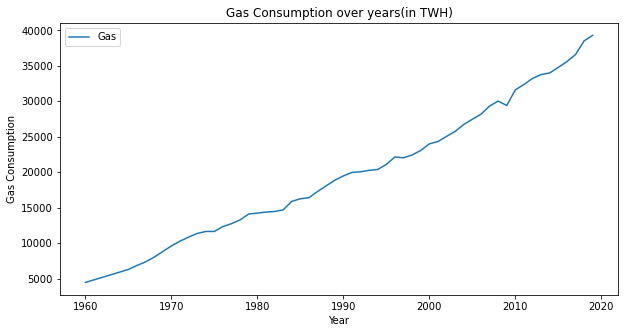

In [10]:
#plotting Gas consumption vs year
plt.figure(figsize=(10,5))
plt.plot(data['Year'],data['Gas(Terawatt-Hours)'],label='Gas')
plt.ylabel("Gas Consumption")
plt.xlabel("Year")
plt.title("Gas Consumption over years(in TWH)")
plt.legend()
plt.show()

### Exporing the Fossil Fuel consumption per Capita

Fossil fuel consumption per capita is measured as the average consumption of energy from coal, oil and gas per person.

In [11]:
df= pd.read_csv("../data/Fossil_Fuels/fossil-fuels-per-capita.csv")
df.head()

,Entity,Code,Year,Fossil fuels per capita (kWh)
0,Africa,NaN,1965,2058.244430
1,Africa,NaN,1966,2103.540893
2,Africa,NaN,1967,2063.597325
3,Africa,NaN,1968,2107.265144
4,Africa,NaN,1969,2082.552855


In [12]:
df=df.rename(columns = {'Fossil fuels per capita (kWh)': 'Fuel(inKWH)'})
#data=data.rename(columns = {'Coal (TWh; direct energy)': 'Coal(Terawatt-Hours)'})

In [13]:
df.head()

,Entity,Code,Year,Fuel(inKWH)
0,Africa,NaN,1965,2058.244430
1,Africa,NaN,1966,2103.540893
2,Africa,NaN,1967,2063.597325
3,Africa,NaN,1968,2107.265144
4,Africa,NaN,1969,2082.552855


In [14]:
#getting per capita fuel consumption for world across years 1965-2019
df_world= df[df['Entity']=='World']
df_world.head()

,Entity,Code,Year,Fuel(inKWH)
4229,World,OWID_WRL,1965,12143.02095
4230,World,OWID_WRL,1966,12526.50918
4231,World,OWID_WRL,1967,12741.70162
4232,World,OWID_WRL,1968,13239.37818
4233,World,OWID_WRL,1969,13848.17371


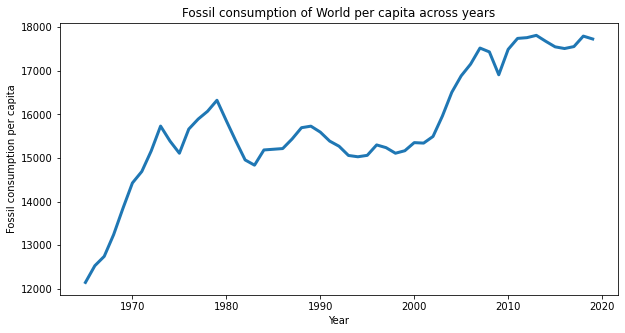

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df_world['Year'],df_world['Fuel(inKWH)'],linewidth=3,)
plt.ylabel("Fossil consumption per capita")
plt.xlabel("Year")
plt.title("Fossil consumption of World per capita across years")
plt.show()

In [16]:
#getting the total fossil fuel consumption per capita by each country starting from 1965
df_per_capita = df.groupby(['Entity'])['Fuel(inKWH)'].sum().sort_values(ascending=False).reset_index()

In [17]:
df_per_capita.head(10)

,Entity,Fuel(inKWH)
0,Qatar,1.047951e+07
1,United Arab Emirates,6.889904e+06
2,Kuwait,5.641712e+06
3,Luxembourg,5.460199e+06
4,Singapore,5.108213e+06
5,Trinidad and Tobago,4.897397e+06
6,North America,4.454627e+06
7,United States,4.279488e+06
8,Canada,3.844275e+06
9,Saudi Arabia,3.460893e+06


In [18]:
#df_per_capita['Fuel(inKWH)'].astype('float64')

In [19]:
#converting kwh to mwh for clear representatio
df_per_capita['Fuel(inMWH)']=df_per_capita['Fuel(inKWH)'].apply(lambda x: x*0.001)
#df_per_capita.rename(columns={'Fossil fuels per capita (kWh)':'Fossil fuels per capita in MWh'},inplace=True)

<AxesSubplot:title={'center':'Total Fuel Consumption across years per Capita'}, xlabel='Fuel(inMWH)', ylabel='Entity'>

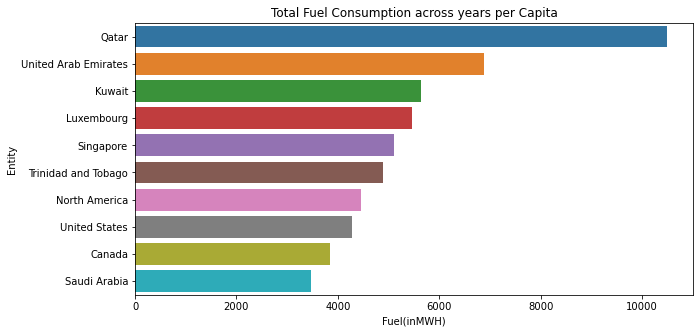

In [20]:
#plotting the top 10 countries
plt.figure(figsize=(10,5))
plt.xlabel("Total Fuel Consumption across years(inKWH)")
plt.title("Total Fuel Consumption across years per Capita")
sns.barplot(x=df_per_capita['Fuel(inMWH)'].head(10),y=df_per_capita['Entity'].head(10))

### Exploring the Total Fossil fuel consumption over years across the world

In [21]:
#getting total fuel consumption(inTWH) 
df1 = pd.read_csv("../data/Fossil_Fuels/fossil-fuel-primary-energy.csv")
df1.head()

,Entity,Code,Year,Fossil Fuels (TWh)
0,Africa,NaN,1965,658.940796
1,Africa,NaN,1966,690.502006
2,Africa,NaN,1967,694.670848
3,Africa,NaN,1968,727.596509
4,Africa,NaN,1969,737.671476


In [22]:
df1_world=  df1[df1['Entity']=='World']
df1_world.head()

,Entity,Code,Year,Fossil Fuels (TWh)
4229,World,OWID_WRL,1965,40552.63849
4230,World,OWID_WRL,1966,42689.37805
4231,World,OWID_WRL,1967,44325.44832
4232,World,OWID_WRL,1968,47020.96368
4233,World,OWID_WRL,1969,50209.05888


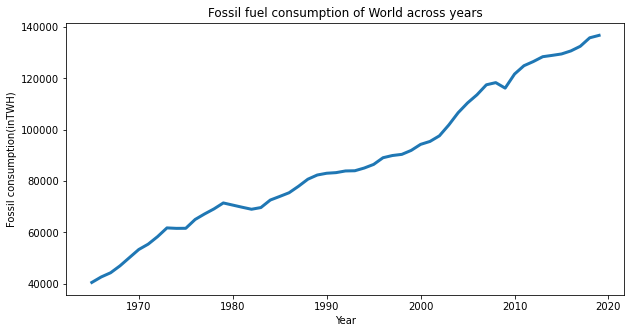

In [23]:
plt.figure(figsize=(10,5))
plt.plot(df1_world['Year'],df1_world['Fossil Fuels (TWh)'],linewidth=3,)
plt.ylabel("Fossil consumption(inTWH)")
plt.xlabel("Year")
plt.title("Fossil fuel consumption of World across years")
plt.show()

In [26]:
data_1970 = data[data['Year']>=1970]
data_1970.to_csv("../data/Merged_Folder/Fossil_Fuels_1970.csv")